## Cat Dog Detection Model

In [18]:
import tensorflow as tf       
from tensorflow import keras   
import matplotlib.pyplot as plt  
from tensorflow.keras import layers
import pandas as pd   
import seaborn as sns   
import numpy as np 
import matplotlib.pylab as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
import pandas as pd
import os

# Path to the folder containing images
image_folder = "cat_dog"  # this is the folder with images like cat1.jpg, dog1.jpg

# Load the CSV file
csv_path = "cat_dog.csv"  # this is the file with 'image' and 'labels' columns
df = pd.read_csv(csv_path)

# Add full image path to the DataFrame
df['image_path'] = df['image'].apply(lambda x: os.path.join(image_folder, x))

# Save into one variable
cat_dog = df

# Display the first few rows
print(cat_dog.head())


           image  labels             image_path
0  dog.11289.jpg       1  cat_dog\dog.11289.jpg
1  cat.10836.jpg       0  cat_dog\cat.10836.jpg
2   cat.7970.jpg       0   cat_dog\cat.7970.jpg
3   cat.2212.jpg       0   cat_dog\cat.2212.jpg
4   dog.2653.jpg       1   cat_dog\dog.2653.jpg


In [20]:
cat_dog.iloc[0]


image                 dog.11289.jpg
labels                            1
image_path    cat_dog\dog.11289.jpg
Name: 0, dtype: object

In [21]:
cat_dog['image']


0        dog.11289.jpg
1        cat.10836.jpg
2         cat.7970.jpg
3         cat.2212.jpg
4         dog.2653.jpg
             ...      
24995    dog.12201.jpg
24996     dog.2893.jpg
24997    cat.12267.jpg
24998     dog.4380.jpg
24999     cat.7962.jpg
Name: image, Length: 25000, dtype: object

In [22]:
cat_dog.iloc[0]['image_path']


'cat_dog\\dog.11289.jpg'

In [23]:
# Set desired image size
img_size = (64, 64)

# Lists to store images and labels
X = []  # images
y = []  # labels

# Load and process each image
for index, row in cat_dog.iterrows():
    try:
        img = Image.open(row['image_path']).convert('RGB')  # ensure 3 channels
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # normalize to 0-1

        X.append(img_array)
        y.append(row['labels'])  # store label

    except Exception as e:
        print(f"Error loading image {row['image_path']}: {e}")


In [24]:
X = np.array(X)
y = np.array(y)

print("Image data shape:", X.shape)
print("Labels shape:", y.shape)


Image data shape: (25000, 64, 64, 3)
Labels shape: (25000,)


In [26]:
X,y

(array([[[[0.29411765, 0.37647059, 0.20392157],
          [0.30980392, 0.37647059, 0.2627451 ],
          [0.31764706, 0.38431373, 0.25882353],
          ...,
          [0.74509804, 0.78039216, 0.69803922],
          [0.87058824, 0.85882353, 0.90196078],
          [0.85882353, 0.83529412, 0.89803922]],
 
         [[0.27058824, 0.31764706, 0.21176471],
          [0.3254902 , 0.39215686, 0.24705882],
          [0.30588235, 0.4       , 0.18431373],
          ...,
          [0.80784314, 0.83921569, 0.83921569],
          [0.86666667, 0.87058824, 0.93333333],
          [0.87058824, 0.85882353, 0.92941176]],
 
         [[0.29411765, 0.3254902 , 0.24705882],
          [0.28235294, 0.3254902 , 0.21176471],
          [0.32941176, 0.40392157, 0.22745098],
          ...,
          [0.65490196, 0.70196078, 0.64313725],
          [0.81568627, 0.82352941, 0.86666667],
          [0.82352941, 0.82352941, 0.87058824]],
 
         ...,
 
         [[0.3254902 , 0.39607843, 0.22352941],
          [0.35686

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),  # fully connected layer
    Dropout(0.5),                   # 🔥 Dropout here
    Dense(1, activation='sigmoid')  # output: 0 (cat), 1 (dog)
])


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,337 (3.14 MB)

 Trainable params: 822,337 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 144ms/step - accuracy: 0.5598 - loss: 0.6886 - val_accuracy: 0.6694 - val_loss: 0.6103
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.6660 - loss: 0.6216 - val_accuracy: 0.7224 - val_loss: 0.5481
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.6933 - loss: 0.5792 - val_accuracy: 0.7668 - val_loss: 0.4938
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.7345 - loss: 0.5338 - val_accuracy: 0.7710 - val_loss: 0.4794
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 141ms/step - accuracy: 0.7539 - loss: 0.5049 - val_accuracy: 0.7886 - val_loss: 0.4571
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.7652 - loss: 0.4845 - val_accuracy: 0.7946 - val_loss: 0.4479
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 142ms/step - accuracy: 0.7744 - loss: 0.4741 - val_accuracy: 0.7998 - val_loss: 0.4347
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 142ms/step - accuracy: 0.7825 - loss: 0

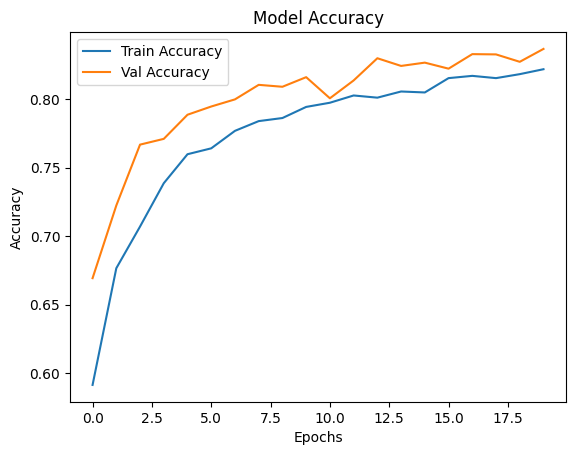

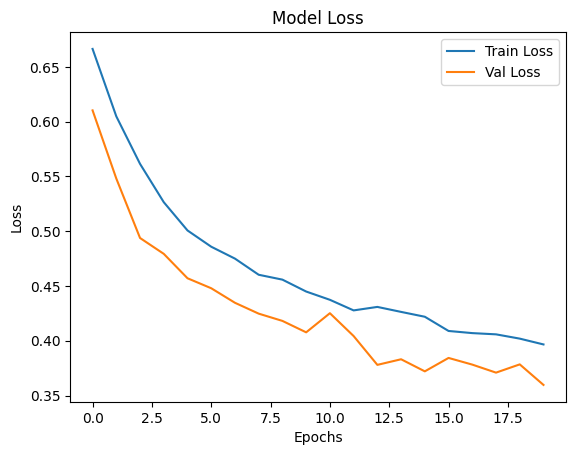

In [39]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8383 - loss: 0.3544
Test Accuracy: 0.84


In [41]:
from PIL import Image
import numpy as np

def predict_image(filepath):
    img = Image.open(filepath).convert('RGB')
    img = img.resize((64, 64))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 64, 64, 3)

    prediction = model.predict(img_array)
    label = 'Dog' if prediction[0][0] > 0.5 else 'Cat'
    print(f"Prediction: {label} (Confidence: {prediction[0][0]:.2f})")


In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def show_and_predict(row_index):
    row = cat_dog.iloc[row_index]
    
    # Load the original image
    img_original = Image.open(row['image_path']).convert('RGB')
    
    # Resize a copy just for prediction
    img_resized = img_original.resize((64, 64))
    img_array = np.array(img_resized) / 255.0
    img_array = img_array.reshape(1, 64, 64, 3)

    # Predict
    prediction = model.predict(img_array)
    label = 'Dog' if prediction[0][0] > 0.5 else 'Cat'
    confidence = prediction[0][0]

    # Show the original (non-blurry) image
    plt.imshow(img_original)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({confidence:.2f})\nTrue: {'Dog' if row['labels'] == 1 else 'Cat'}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


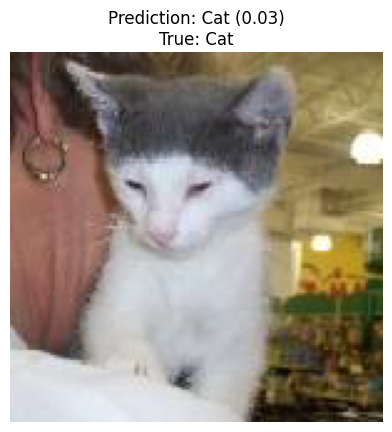

In [52]:
show_and_predict(1100)
